# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import accuracy

In [2]:
data_movies_metadata = pd.read_csv('D:\Projects\ISM\DataScience\Movies\movies_metadata.csv')
data_ratings =pd.read_csv('ratings_small.csv')

C:\Users\thdam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_keywords = pd.read_csv('D:\Projects\ISM\DataScience\Movies\keywords.csv')

Merge data

In [4]:
data_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [5]:
import ast

In [6]:
def extract_keywords(json_data):
    try:
        data = ast.literal_eval(json_data)  # Safely convert the string to list of dictionaries
        return [item['name'] for item in data]  # Extract 'name' from each dictionary
    except (ValueError, SyntaxError):  # Handle errors if the data isn't properly formatted
        return []

# Apply the function to the 'keywords' column and create a new column 'keywords_extracted'
data_keywords['keywords_extracted'] = data_keywords['keywords'].apply(extract_keywords)

# Display the DataFrame
data_keywords

,id,keywords,keywords_extracted
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[based on novel, interracial relationship, sin..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[baby, midlife crisis, confidence, aging, daug..."
...,...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]",[tragic love]
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,...","[artist, play, pinoy]"
46416,67758,[],[]
46417,227506,[],[]


In [7]:
data_keywords.drop(columns = ['keywords'], inplace =True)

In [8]:
data_keywords.head()

,id,keywords_extracted
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


In [9]:
data_ratings['movieId'] = data_ratings['movieId'].astype(str)
data_movies_metadata['id'] = data_movies_metadata['id'].astype(str)
merged_data = pd.merge(data_ratings, data_movies_metadata, left_on='movieId', right_on='id', how='inner')
merged_data.head()

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,1371,2.5,1260759135,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
1,4,1371,4.0,949810302,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
2,7,1371,3.0,851869160,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
3,19,1371,4.0,855193404,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
4,21,1371,3.0,853852263,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1371,...,1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0


In [10]:
data_keywords['id'] = data_keywords['id'].astype(str)
merged_data = pd.merge(data_keywords, merged_data, left_on='id', right_on='movieId', how='inner')
#should have the same user id - movie id with the other approach
merged_data.head()

,id_x,keywords_extracted,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,949,"[robbery, detective, bank, obsession, chase, s...",23,949,3.5,1148721092,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
1,949,"[robbery, detective, bank, obsession, chase, s...",102,949,4.0,956598942,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
2,949,"[robbery, detective, bank, obsession, chase, s...",232,949,2.0,955092697,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
3,949,"[robbery, detective, bank, obsession, chase, s...",242,949,5.0,956688825,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
4,949,"[robbery, detective, bank, obsession, chase, s...",263,949,3.0,1117846575,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


# Preprocessing data

In [11]:
merged_data.describe(include ='all')

,id_x,keywords_extracted,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45020,45020,45020.000000,45020,45020.000000,4.502000e+04,45020,10793,45020,45020,...,44991,4.502000e+04,45016.000000,45020,45019,31532,45020,45020,45020.000000,45020.000000
unique,2830,2467,NaN,2830,NaN,NaN,2,345,313,790,...,2444,NaN,NaN,404,4,1786,2794,2,NaN,NaN
top,296,[],NaN,296,NaN,NaN,False,"{'id': 528, 'name': 'The Terminator Collection...",0,"[{'id': 18, 'name': 'Drama'}]",...,2003-07-02,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Machines Will Rise.,Terminator 3: Rise of the Machines,False,NaN,NaN
freq,324,1706,NaN,324,NaN,NaN,45019,386,19539,4955,...,324,NaN,NaN,22473,44965,324,324,45016,NaN,NaN
mean,NaN,NaN,345.990893,NaN,3.560962,1.089542e+09,NaN,NaN,NaN,NaN,...,NaN,7.609657e+07,108.986094,NaN,NaN,NaN,NaN,NaN,6.633023,669.186539
std,NaN,NaN,194.876604,NaN,1.053100,1.878316e+08,NaN,NaN,NaN,NaN,...,NaN,1.758587e+08,24.912423,NaN,NaN,NaN,NaN,NaN,1.062314,1219.128766
min,NaN,NaN,1.000000,NaN,0.500000,7.896520e+08,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,177.000000,NaN,3.000000,9.472927e+08,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.100000,31.000000
50%,NaN,NaN,359.000000,NaN,4.000000,1.053172e+09,NaN,NaN,NaN,NaN,...,NaN,2.201126e+06,106.000000,NaN,NaN,NaN,NaN,NaN,6.800000,176.000000
75%,NaN,NaN,518.000000,NaN,4.000000,1.227917e+09,NaN,NaN,NaN,NaN,...,NaN,7.418968e+07,121.000000,NaN,NaN,NaN,NaN,NaN,7.300000,672.000000


In [12]:
merged_data.isnull().sum()

id_x                         0
keywords_extracted           0
userId                       0
movieId                      0
rating                       0
timestamp                    0
adult                        0
belongs_to_collection    34227
budget                       0
genres                       0
homepage                 34061
id_y                         0
imdb_id                      0
original_language            0
original_title               0
overview                   138
popularity                   0
poster_path                 36
production_companies         0
production_countries         0
release_date                29
revenue                      0
runtime                      4
spoken_languages             0
status                       1
tagline                  13488
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

# Data preprocessing

## Keywords

In [13]:
merged_data['keywords_extracted']

0        [robbery, detective, bank, obsession, chase, s...
1        [robbery, detective, bank, obsession, chase, s...
2        [robbery, detective, bank, obsession, chase, s...
3        [robbery, detective, bank, obsession, chase, s...
4        [robbery, detective, bank, obsession, chase, s...
                               ...                        
45015                                     [woman director]
45016                                     [woman director]
45017                                     [woman director]
45018                                                   []
45019                                                   []
Name: keywords_extracted, Length: 45020, dtype: object

## Timestamp

In [14]:
merged_data['timestamp']

0        1148721092
1         956598942
2         955092697
3         956688825
4        1117846575
            ...    
45015    1441513491
45016    1435789819
45017    1241951834
45018    1420521986
45019    1228072108
Name: timestamp, Length: 45020, dtype: int64

In [15]:
merged_data['year'] = pd.to_datetime(merged_data['timestamp'], unit='s').dt.year
merged_data['year']

0        2006
1        2000
2        2000
3        2000
4        2005
         ... 
45015    2015
45016    2015
45017    2009
45018    2015
45019    2008
Name: year, Length: 45020, dtype: int64

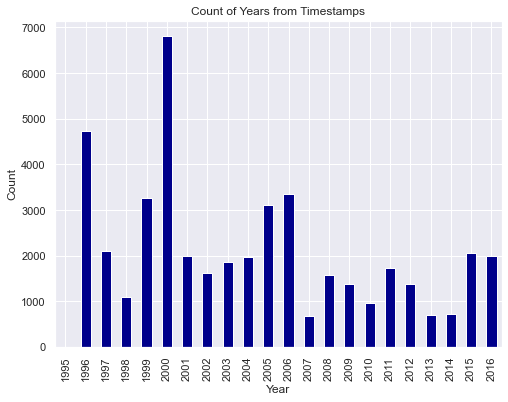

In [16]:
year_counts = merged_data['year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8,6))
year_counts.plot(kind='bar', color='darkblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years from Timestamps')

# Display the plot
plt.show()

## Adult

In [17]:
merged_data['adult'].value_counts()

False    45019
True         1
Name: adult, dtype: int64

In [18]:
merged_data['genres']

0        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
1        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
2        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
3        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
                               ...                        
45015    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
45016    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
45017    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
45018    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
45019    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
Name: genres, Length: 45020, dtype: object

In [19]:
def extract_genres(json_data):
    try:
        data = ast.literal_eval(json_data)  # Safely convert the string to list of dictionaries
        return [item['name'] for item in data]  # Extract 'name' from each dictionary
    except (ValueError, SyntaxError):  # Handle errors if the data isn't properly formatted
        return []

# Apply the function to the 'keywords' column and create a new column 'keywords_extracted'
merged_data['genres_extracted'] = merged_data['genres'].apply(extract_genres)

In [20]:
merged_data.head()

,id_x,keywords_extracted,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genres_extracted
0,949,"[robbery, detective, bank, obsession, chase, s...",23,949,3.5,1148721092,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,2006,"[Action, Crime, Drama, Thriller]"
1,949,"[robbery, detective, bank, obsession, chase, s...",102,949,4.0,956598942,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,2000,"[Action, Crime, Drama, Thriller]"
2,949,"[robbery, detective, bank, obsession, chase, s...",232,949,2.0,955092697,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,2000,"[Action, Crime, Drama, Thriller]"
3,949,"[robbery, detective, bank, obsession, chase, s...",242,949,5.0,956688825,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,2000,"[Action, Crime, Drama, Thriller]"
4,949,"[robbery, detective, bank, obsession, chase, s...",263,949,3.0,1117846575,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,2005,"[Action, Crime, Drama, Thriller]"


In [21]:
merged_data.isnull().sum()

id_x                         0
keywords_extracted           0
userId                       0
movieId                      0
rating                       0
timestamp                    0
adult                        0
belongs_to_collection    34227
budget                       0
genres                       0
homepage                 34061
id_y                         0
imdb_id                      0
original_language            0
original_title               0
overview                   138
popularity                   0
poster_path                 36
production_companies         0
production_countries         0
release_date                29
revenue                      0
runtime                      4
spoken_languages             0
status                       1
tagline                  13488
title                        0
video                        0
vote_average                 0
vote_count                   0
year                         0
genres_extracted             0
dtype: i

In [22]:
pd.set_option('display.max_colwidth', None) 

## Popularity

In [23]:
merged_data['popularity']

0         17.9249
1         17.9249
2         17.9249
3         17.9249
4         17.9249
           ...   
45015    0.528657
45016    0.528657
45017    0.528657
45018    0.803588
45019    1.109068
Name: popularity, Length: 45020, dtype: object

## Production Companies

In [24]:
merged_data['production_companies']

0        [{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]
1        [{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]
2        [{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]
3        [{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]
4        [{'name': 'Regency Enterprises', 'id': 508}, {'name': 'Forward Pass', 'id': 675}, {'name': 'Warner Bros.', 'id': 6194}]
                                                                  ...                                                           
45015                                                                                                                         []
45016                                                                                            

In [25]:
def extract_genres(json_data):
    try:
        data = ast.literal_eval(json_data)  # Safely convert the string to list of dictionaries
        return [item['name'] for item in data]  # Extract 'name' from each dictionary
    except (ValueError, SyntaxError):  # Handle errors if the data isn't properly formatted
        return []

# Apply the function to the 'keywords' column and create a new column 'keywords_extracted'
merged_data['production_companies_extracted'] = merged_data['production_companies'].apply(extract_genres)

In [26]:
merged_data['production_companies_extracted']

0        [Regency Enterprises, Forward Pass, Warner Bros.]
1        [Regency Enterprises, Forward Pass, Warner Bros.]
2        [Regency Enterprises, Forward Pass, Warner Bros.]
3        [Regency Enterprises, Forward Pass, Warner Bros.]
4        [Regency Enterprises, Forward Pass, Warner Bros.]
                               ...                        
45015                                                   []
45016                                                   []
45017                                                   []
45018            [Channel One Russia, Central Partnership]
45019                                  [Star Film Company]
Name: production_companies_extracted, Length: 45020, dtype: object

## Production_countries

In [27]:
merged_data['production_countries'].value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                   21794
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                              2428
[{'iso_3166_1': 'DE', 'name': 'Germany'}]                                                                                                     2235
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                      2198
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                    1741
                                                                                                                                             ...  
[{'iso_3166_1': 'CL', 'name': 'Chile'}, {'iso_3166_1': 'DE', 'name': 'Germany'}]                                      

In [28]:
merged_data['production_countries_extracted'] = merged_data['production_countries'].apply(extract_genres)

In [29]:
merged_data['tagline']

0        A Los Angeles Crime Saga
1        A Los Angeles Crime Saga
2        A Los Angeles Crime Saga
3        A Los Angeles Crime Saga
4        A Los Angeles Crime Saga
                   ...           
45015                         NaN
45016                         NaN
45017                         NaN
45018                         NaN
45019                         NaN
Name: tagline, Length: 45020, dtype: object

In [30]:
merged_data[['vote_average','vote_count']]

,vote_average,vote_count
0,7.7,1886.0
1,7.7,1886.0
2,7.7,1886.0
3,7.7,1886.0
4,7.7,1886.0
...,...,...
45015,6.0,5.0
45016,6.0,5.0
45017,6.0,5.0
45018,4.6,6.0


In [31]:
merged_data['vote_average'].describe()

count    45020.000000
mean         6.633023
std          1.062314
min          0.000000
25%          6.100000
50%          6.800000
75%          7.300000
max         10.000000
Name: vote_average, dtype: float64

(array([1.1000e+01, 3.2000e+01, 2.9500e+02, 6.8400e+02, 3.1370e+03,
        1.1918e+04, 1.9068e+04, 9.4870e+03, 9.1000e+01, 1.0000e+00]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 10 Patch objects>)

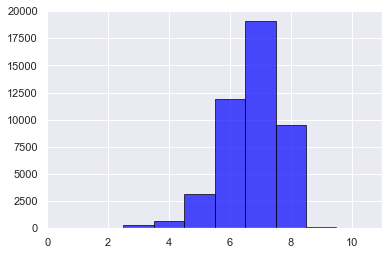

In [32]:
plt.hist(merged_data['vote_average'], bins=np.arange(0.5, 11.5, 1), color='blue', edgecolor='black', alpha=0.7)

In [33]:
merged_data['vote_count'].describe()

count    45020.000000
mean       669.186539
std       1219.128766
min          0.000000
25%         31.000000
50%        176.000000
75%        672.000000
max      12269.000000
Name: vote_count, dtype: float64

(array([1.63836223e-03, 2.82972558e-04, 1.25246587e-04, 7.93518056e-05,
        7.15306831e-05, 5.76807786e-05, 2.22684739e-05, 4.70353619e-05,
        2.33004275e-05, 3.78020922e-05, 8.96170290e-06, 5.26839504e-06,
        1.05367901e-05, 2.55272749e-06, 4.18212802e-06, 5.81152854e-06,
        4.45369477e-06, 3.91056126e-06, 1.03738500e-05, 4.34506807e-07,
        1.30352042e-06, 7.06073561e-07, 5.43133509e-08, 5.97446860e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.88820158e-07]),
 array([    0.        ,   408.96666667,   817.93333333,  1226.9       ,
         1635.86666667,  2044.83333333,  2453.8       ,  2862.76666667,
         3271.73333333,  3680.7       ,  4089.66666667,  4498.63333333,
         4907.6       ,  5316.56666667,  5725.53333333,  6134.5       ,
         6543.46666667,  6952.43333333,  7361.4       ,  7770.36666667,
         8179.33333333,  8588.3       ,  8997.26666667,  9406.23333333,
         9815.2       

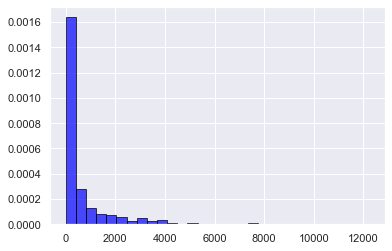

In [34]:
plt.hist(merged_data['vote_count'], bins=30, color='blue', alpha=0.7, density=True, edgecolor='black')

In [35]:
merged_data['year']

0        2006
1        2000
2        2000
3        2000
4        2005
         ... 
45015    2015
45016    2015
45017    2009
45018    2015
45019    2008
Name: year, Length: 45020, dtype: int64

## Release date

In [36]:
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])
merged_data['release_year'] = merged_data['release_date'].dt.year

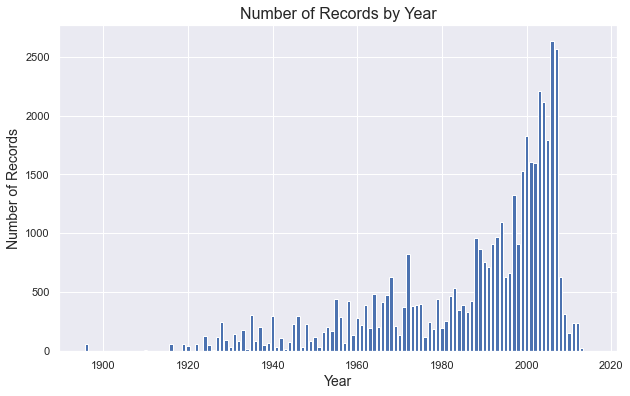

In [37]:
year_counts = merged_data['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='b')

# Step 5: Add titles and labels
plt.title('Number of Records by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.grid(True)

# Step 6: Show the plot
plt.show()

In [38]:
merged_data['release_year'].value_counts()

2006.0    2635
2007.0    2567
2003.0    2207
2004.0    2115
2000.0    1830
          ... 
1903.0       1
1911.0       1
1914.0       1
2014.0       1
1900.0       1
Name: release_year, Length: 104, dtype: int64

In [39]:
# fill null year with 2006
merged_data['release_year'].fillna(2006, inplace=True)

In [40]:
merged_data['release_year'].value_counts()

2006.0    2664
2007.0    2567
2003.0    2207
2004.0    2115
2000.0    1830
          ... 
1903.0       1
1911.0       1
1914.0       1
2014.0       1
1900.0       1
Name: release_year, Length: 104, dtype: int64

## Runtime

In [41]:
merged_data['runtime']

0        170.0
1        170.0
2        170.0
3        170.0
4        170.0
         ...  
45015     97.0
45016     97.0
45017     97.0
45018     91.0
45019      1.0
Name: runtime, Length: 45020, dtype: float64

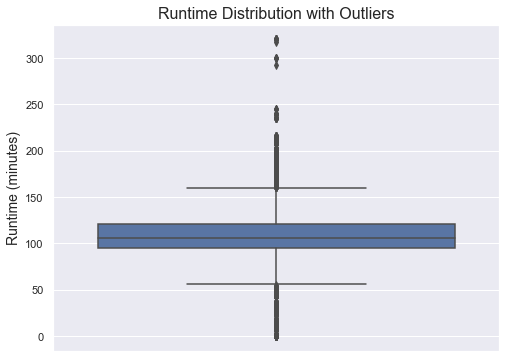

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_data['runtime'])

# Step 3: Add title and labels
plt.title('Runtime Distribution with Outliers', fontsize=16)
plt.ylabel('Runtime (minutes)', fontsize=14)

# Step 4: Show the plot
plt.show()

C:\Users\thdam\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thdam\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


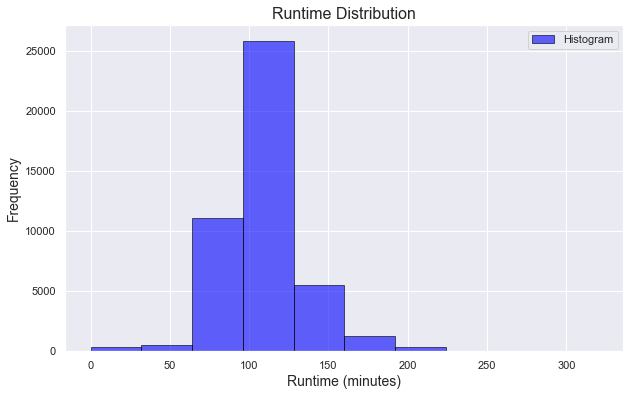

In [43]:
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(merged_data['runtime'], bins=10, color='blue', alpha=0.6, edgecolor='black', label='Histogram')

# Step 3: Add titles and labels
plt.title('Runtime Distribution', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Step 4: Show the plot
plt.show()

In [44]:
# Fill missing values with mode
merged_data['runtime'].fillna(merged_data['runtime'].mode()[0], inplace=True)

## Tagline

In [45]:
merged_data['tagline'].fillna('', inplace=True)

## To be deleted: Adult, belongs_to_collection, hompage, id_y, imdb_id, original_language, original_title, popularity, overview,poster_path, status, vote_average, vote_count, 'timestamp', year, spoken language

In [46]:
merged_data.columns.values

array(['id_x', 'keywords_extracted', 'userId', 'movieId', 'rating',
       'timestamp', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id_y', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'video', 'vote_average', 'vote_count', 'year',
       'genres_extracted', 'production_companies_extracted',
       'production_countries_extracted', 'release_year'], dtype=object)

In [47]:
merged_data.drop(columns= ['id_x','adult','timestamp', 'belongs_to_collection','homepage', 'id_y', 'imdb_id','release_date', 'original_language',
       'original_title','overview', 'poster_path','spoken_languages', 'status', 'video', 'vote_count', 'year','genres','production_companies', 'production_countries'], inplace = True)

In [48]:
merged_data.head()

,keywords_extracted,userId,movieId,rating,budget,popularity,revenue,runtime,tagline,title,vote_average,genres_extracted,production_companies_extracted,production_countries_extracted,release_year
0,"[robbery, detective, bank, obsession, chase, shooting, thief, honor, murder, suspense, heist, betrayal, money, gang, cat and mouse, criminal mastermind, cult film, ex-con, heist movie, one last job, loner, bank job, neo-noir, gun fight, crime epic]",23,949,3.5,60000000,17.9249,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995.0
1,"[robbery, detective, bank, obsession, chase, shooting, thief, honor, murder, suspense, heist, betrayal, money, gang, cat and mouse, criminal mastermind, cult film, ex-con, heist movie, one last job, loner, bank job, neo-noir, gun fight, crime epic]",102,949,4.0,60000000,17.9249,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995.0
2,"[robbery, detective, bank, obsession, chase, shooting, thief, honor, murder, suspense, heist, betrayal, money, gang, cat and mouse, criminal mastermind, cult film, ex-con, heist movie, one last job, loner, bank job, neo-noir, gun fight, crime epic]",232,949,2.0,60000000,17.9249,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995.0
3,"[robbery, detective, bank, obsession, chase, shooting, thief, honor, murder, suspense, heist, betrayal, money, gang, cat and mouse, criminal mastermind, cult film, ex-con, heist movie, one last job, loner, bank job, neo-noir, gun fight, crime epic]",242,949,5.0,60000000,17.9249,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995.0
4,"[robbery, detective, bank, obsession, chase, shooting, thief, honor, murder, suspense, heist, betrayal, money, gang, cat and mouse, criminal mastermind, cult film, ex-con, heist movie, one last job, loner, bank job, neo-noir, gun fight, crime epic]",263,949,3.0,60000000,17.9249,187436818.0,170.0,A Los Angeles Crime Saga,Heat,7.7,"[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995.0


In [49]:
merged_data.describe(include='all')

,keywords_extracted,userId,movieId,rating,budget,popularity,revenue,runtime,tagline,title,vote_average,genres_extracted,production_companies_extracted,production_countries_extracted,release_year
count,45020,45020.000000,45020,45020.000000,45020,45020.000000,4.502000e+04,45020.000000,45020,45020,45020.000000,45020,45020,45020,45020.000000
unique,2467,NaN,2830,NaN,313,2831.000000,NaN,NaN,1787,2794,NaN,790,2068,366,NaN
top,[],NaN,296,NaN,0,20.818907,NaN,NaN,,Terminator 3: Rise of the Machines,NaN,[Drama],[],[United States of America],NaN
freq,1706,NaN,324,NaN,19539,324.000000,NaN,NaN,13488,324,NaN,4955,2213,21794,NaN
mean,NaN,345.990893,NaN,3.560962,NaN,NaN,7.609657e+07,108.984940,NaN,NaN,6.633023,NaN,NaN,NaN,1987.123345
std,NaN,194.876604,NaN,1.053100,NaN,NaN,1.758587e+08,24.911617,NaN,NaN,1.062314,NaN,NaN,NaN,21.478574
min,NaN,1.000000,NaN,0.500000,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1896.000000
25%,NaN,177.000000,NaN,3.000000,NaN,NaN,0.000000e+00,95.000000,NaN,NaN,6.100000,NaN,NaN,NaN,1974.000000
50%,NaN,359.000000,NaN,4.000000,NaN,NaN,2.201126e+06,106.000000,NaN,NaN,6.800000,NaN,NaN,NaN,1995.000000
75%,NaN,518.000000,NaN,4.000000,NaN,NaN,7.418968e+07,121.000000,NaN,NaN,7.300000,NaN,NaN,NaN,2003.000000


In [50]:
merged_data.isnull().sum()

keywords_extracted                0
userId                            0
movieId                           0
rating                            0
budget                            0
popularity                        0
revenue                           0
runtime                           0
tagline                           0
title                             0
vote_average                      0
genres_extracted                  0
production_companies_extracted    0
production_countries_extracted    0
release_year                      0
dtype: int64

# Feature Engineering

## Encode genres using One-Hot Encoding

In [51]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MultiLabelBinarizer

# Convert genres from string to list
# merged_data['genres_extracted'] = merged_data['genres_extracted'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(merged_data['genres_extracted'])


genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
merged_data = pd.concat([merged_data, genres_df], axis=1)

In [52]:
merged_data.shape

(45020, 35)

# Encode keywords, production companies, production countries using TF-IDF

In [53]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# # Step 1: Convert lists to strings
# merged_data['production_companies_extracted'] = [' '.join(companies) for companies in merged_data['production_companies_extracted']]
# merged_data['keywords_extracted'] = [' '.join(keywords) for keywords in merged_data['keywords_extracted']]
# merged_data['production_countries_extracted'] = [' '.join(keywords) for keywords in merged_data['production_countries_extracted']]

In [55]:
# merged_data['combined_features'] = merged_data['production_companies_extracted'] + ' ' + merged_data['keywords_extracted']+ ' ' + merged_data['production_countries_extracted']

In [56]:
# # Step 3: Apply TF-IDF to the 'production_companies_extracted' column
# tfidf = TfidfVectorizer(max_features=500, stop_words='english')  # Ignore common English stop words
# features_tfidf = tfidf.fit_transform(merged_data['combined_features'])

In [57]:
# from sklearn.decomposition import TruncatedSVD
# svd = TruncatedSVD(n_components=100)  # Reduce to 50 components
# features_reduced = svd.fit_transform(features_tfidf)
# reduced_df = pd.DataFrame(features_reduced)

In [58]:
# merged_data = pd.concat([merged_data, reduced_df], axis=1)

In [59]:
# merged_data.shape

In [60]:
# merged_data.columns.values

## Scale Numerical Features

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['budget', 'revenue','runtime', 'release_year', 'vote_average', 'popularity']
merged_data[numerical_features] = scaler.fit_transform(merged_data[numerical_features])

In [63]:
# Select features
X = merged_data.drop(columns=['keywords_extracted', 'userId', 'movieId', 'rating', 'tagline', 'title', 'genres_extracted',
       'production_companies_extracted', 'production_countries_extracted'])
y = merged_data['rating']

In [64]:
X.columns.values

array(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'release_year', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype=object)

# Feature selections

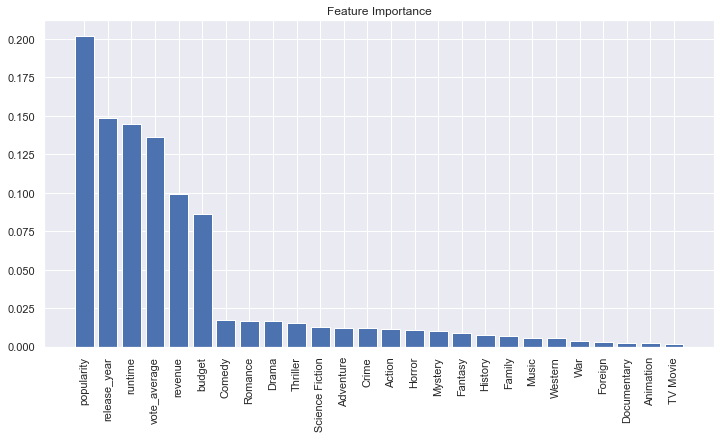

In [65]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a simple Random Forest for feature importance
rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


# Train Model

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.describe()

,budget,popularity,revenue,runtime,vote_average,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,...,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000,36016.000000
mean,-0.003289,-0.001653,-0.002498,0.001562,0.001337,-0.000043,0.200883,0.140937,0.022323,0.284401,...,0.039010,0.081464,0.035401,0.102732,0.184363,0.122001,0.005720,0.253498,0.022351,0.022546
std,0.996951,0.999581,0.991985,0.997613,1.001224,0.999850,0.400666,0.347962,0.147735,0.451135,...,0.193622,0.273550,0.184794,0.303613,0.387785,0.327292,0.075413,0.435020,0.147825,0.148451
min,-0.527120,-1.206075,-0.432719,-4.374913,-6.244005,-4.242570,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.527120,-0.732830,-0.432719,-0.561388,-0.501762,-0.611004,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.487808,-0.082859,-0.420203,-0.119823,0.157184,0.366726,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.101876,0.487559,-0.015751,0.482313,0.627860,0.739194,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.431980,19.637044,10.058972,8.470642,3.169508,1.297896,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
string_columns = [col for col in X_train.columns if merged_data[col].dtype == 'object']

print("Columns containing string values:", string_columns)

Columns containing string values: []


In [69]:
# # long time to run!
# from sklearn.model_selection import cross_val_score

# # 5-Fold Cross-Validation
# cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
# print(f'Random Forest 5-Fold CV Mean Score: {cv_scores.mean()}')

Content-based models: These are often not as powerful as collaborative filtering models, which can capture patterns from user interactions with the system.
Combining models: You mentioned that you would combine the content-based approach with collaborative filtering later, which might improve overall performance.


In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the models to evaluate
    models = {
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
    }
    
    # Evaluate each model
    results = []
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate Mean Squared Error and R² score
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'MSE': mse,
            'R² Score': r2
        })
        
        # Print the results
        print(f"{model_name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Example usage:
# Assuming X_train and y_train are your features and target variable
# results = train_and_evaluate_models(X_train, y_train)


With other text features

Decision Tree - MSE: 0.9683, R² Score: 0.1085

Random Forest - MSE: 0.9366, R² Score: 0.1377

SVR - MSE: 0.9753, R² Score: 0.1021

In [71]:
results = train_and_evaluate_models(X_train, y_train)

Decision Tree - MSE: 0.9684, R² Score: 0.1085
Random Forest - MSE: 0.9374, R² Score: 0.1370
SVR - MSE: 1.0026, R² Score: 0.0769
